# SLR Height Prediction

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
df0 = pd.read_csv('./height-weight.csv')
df = df0.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


## EDA

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['weight', 'height'], dtype='object')

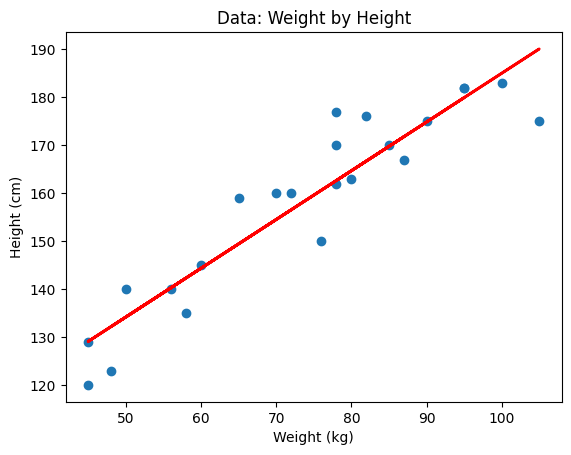

In [6]:
plt.scatter(df['weight'],df['height'])

# Calculate the best fit line
slope, intercept = np.polyfit(df['weight'], df['height'], 1)
best_fit_line = slope * df['weight'] + intercept

# Add the best fit line to the plot
plt.plot(df['weight'], best_fit_line, color='red', linewidth=2, label='Best Fit Line')

plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Data: Weight by Height')

plt.show();

In [7]:
# Correlation between Weight and Height
df.corr()

,weight,height
weight,1.000000,0.931142
height,0.931142,1.000000


In [8]:
import seaborn as sns

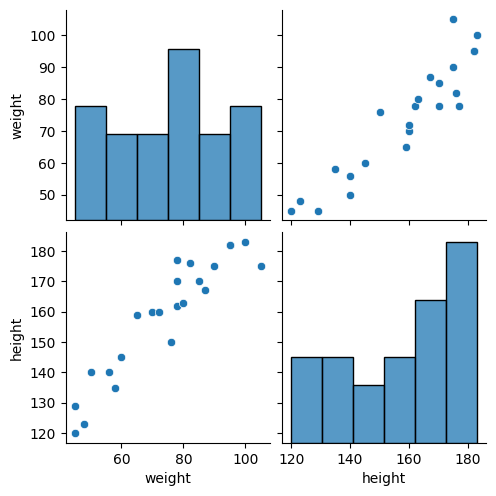

In [9]:
# Pairplot
sns.pairplot(df);

## Data Preparation

In [10]:
# Declare X & Y var

# X MUST be in DataFrame or a 2D Array
X = df[['weight']]

# y MUST be in Series or a 1D Array
y = df['height']

In [11]:
X

,weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [12]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: height, dtype: int64

In [13]:
# Independent features MUST be in DataFrame or 2D Arrays (e.g. np.array(X))
type(X)

pandas.core.frame.DataFrame

In [14]:
X.shape

(23, 1)

In [15]:
# Dependent feature MUST be in Series or a 1D Array (e.g. )
type(y)

pandas.core.series.Series

In [16]:
y.shape

(23,)

## Train the Model

In [17]:
# Train-Test Split
from sklearn.model_selection import train_test_split 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [19]:
# Standardisation: Convert each X feature into Z Score (to have µ = 0, σ = 1)
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [24]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

## Simple Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regression = LinearRegression()

In [27]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
print('Coefficient: ',regression.coef_[0])
print('Intercept: ',regression.intercept_)

Coefficient:  17.29820570436306
Intercept:  156.47058823529412


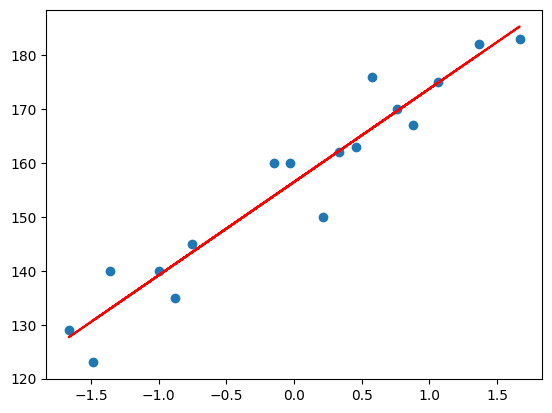

In [29]:
# Plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red')

#### Prediction of Test Data
predicted height output = intercept + coefficient (weights)

y_pred_test = 156.47058823529412 + 17.29820570436306 (X_test)

In [30]:
# Prediction
y_pred = regression.predict(X_test)

## Performance Metrics

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

In [33]:
print('mse: ',mse)
print('mae: ',mae)
print('rmse', rmse)
print('r2: ', r2)
print('adj_r2:', adj_r2)

mse:  114.84069295228699
mae:  9.66512588679501
rmse 10.716374991212605
r2:  0.7360826717981276
adj_r2: 0.6701033397476595


### OLS Linear Regression

In [34]:
import statsmodels.api as sm

In [35]:
model = sm.OLS(y_train,X_train).fit()

In [36]:
prediction = model.predict(X_test)

In [37]:
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [38]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 07 Oct 2025   Prob (F-statistic):                       0.664
Time:                        09:57:54   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Prediction

In [39]:
# Prediction for new data

# New weight
new_weight = pd.DataFrame({'weight':[72]})

# New Prediction
new_pred = regression.predict(scaler.transform(new_weight))[0]

In [40]:
print(new_pred)

155.9774470462742


---